In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [3]:
#importing the dataset
data=pd.read_csv('India_GDP_1960-2022.csv')
data.shape

(63, 5)

In [4]:
data.head

<bound method NDFrame.head of     Unnamed: 0 India GDP - Historical Data India GDP - Historical Data.1  \
0          NaN                        Year            GDP in (Billion) $   
1          0.0                        2021                        3173.4   
2          1.0                        2020                       2667.69   
3          2.0                        2019                       2831.55   
4          3.0                        2018                       2702.93   
..         ...                         ...                           ...   
58        57.0                        1964                         56.48   
59        58.0                        1963                         48.42   
60        59.0                        1962                         42.16   
61        60.0                        1961                         39.23   
62        61.0                        1960                         37.03   

   India GDP - Historical Data.2 India GDP - Historical D

In [5]:
#Let's check any null values in dataset
data.isnull().sum()

Unnamed: 0                       1
India GDP - Historical Data      0
India GDP - Historical Data.1    0
India GDP - Historical Data.2    0
India GDP - Historical Data.3    0
dtype: int64

In [6]:
#Dropping the Unnamed coloumn as it doesn not contain any relevant information
data=data.drop(['Unnamed: 0'], axis=1)
data

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [7]:
data = data.rename(columns={'India GDP - Historical Data': 'Year' ,
                        'India GDP - Historical Data.1' : 'GDP',
                       'India GDP - Historical Data.2' : 'Per Capita',
                       'India GDP - Historical Data.3': 'Growth %'})

data

,Year,GDP,Per Capita,Growth %
0,Year,GDP in (Billion) $,Per Capita in rupees,Growth %
1,2021,3173.4,182160,8.95
2,2020,2667.69,154640,-6.6
3,2019,2831.55,165760,3.74
4,2018,2702.93,159840,6.45
...,...,...,...,...
58,1964,56.48,9280,7.45
59,1963,48.42,8080,5.99
60,1962,42.16,7200,2.93
61,1961,39.23,6800,3.72


In [8]:
#setting the 'Year' coloumn as the index 
data.set_index('Year',inplace=True)
data

,GDP,Per Capita,Growth %
Year,,,
Year,GDP in (Billion) $,Per Capita in rupees,Growth %
2021,3173.4,182160,8.95
2020,2667.69,154640,-6.6
2019,2831.55,165760,3.74
2018,2702.93,159840,6.45
...,...,...,...
1964,56.48,9280,7.45
1963,48.42,8080,5.99
1962,42.16,7200,2.93


In [9]:
data = data.sort_values(by='Year', ascending=True)
data

,GDP,Per Capita,Growth %
Year,,,
1960,37.03,6560,0
1961,39.23,6800,3.72
1962,42.16,7200,2.93
1963,48.42,8080,5.99
1964,56.48,9280,7.45
...,...,...,...
2018,2702.93,159840,6.45
2019,2831.55,165760,3.74
2020,2667.69,154640,-6.6


In [10]:
#dropping the last row shown above
data = data.drop(['Year'], axis=0)
data

,GDP,Per Capita,Growth %
Year,,,
1960,37.03,6560,0
1961,39.23,6800,3.72
1962,42.16,7200,2.93
1963,48.42,8080,5.99
1964,56.48,9280,7.45
...,...,...,...
2017,2651.47,158480,6.8
2018,2702.93,159840,6.45
2019,2831.55,165760,3.74


In [11]:
data.isna().sum()

GDP           0
Per Capita    0
Growth %      0
dtype: int64

In [12]:
print(data['GDP'].dtype)
print(data['Per Capita'].dtype)
print(data['Growth %'].dtype)

object
object
object


In [13]:
data['Growth %'] = pd.to_numeric(data['Growth %'])
data['GDP'] = pd.to_numeric(data['GDP'])
data['Per Capita'] = pd.to_numeric(data['Per Capita'])

In [14]:
#Calculating averages to establish benchmarks for normal economic conditions.
average_dataframe = data.mean()
average_dataframe

GDP             699.036452
Per Capita    48210.322581
Growth %          5.007258
dtype: float64

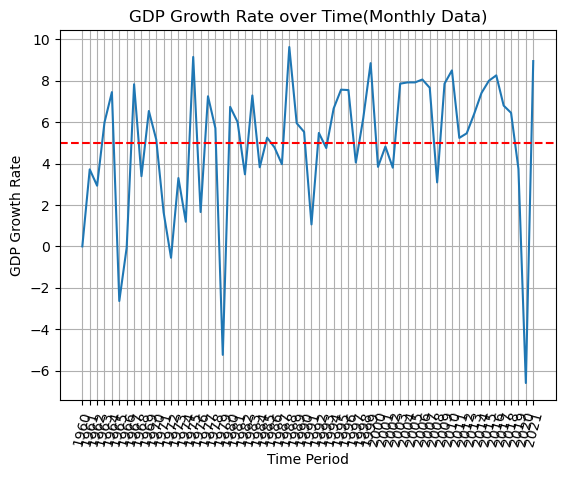

In [20]:
#Plotting using Matplotlib
plt.plot(data['Growth %'])
plt.xlabel('Time Period')
plt.ylabel('GDP Growth Rate')
plt.xticks(rotation = 75)
plt.title('GDP Growth Rate over Time(Monthly Data)')
plt.grid(True)
plt.axhline(y=average_dataframe['Growth %'], color='r', linestyle='--', label='Mean')
plt.show()

In [16]:
fig = px.line(data, x=data.index, y='Growth %', title='Growth % from 1960 to 2021')
fig.update_traces(mode='lines+markers',line=dict(color='Purple'))
fig.update_layout(title=dict(x=0.5))
fig.add_hline(y=average_dataframe['Growth %'], line_dash="dash", line_color="red", annotation_text=f'Mean: {average_dataframe["Growth %"].round(3)}', annotation_position="bottom right")
fig.show()

A sustained period of negative GDP growth over multiple years can indicate a recession. Hence we look for years where the GDP growth rate is significantly below historical averages or negative for consecutive years.

In [17]:
#Looking for years where the growth is in decline
data['Recession'] = ((data['Growth %'] < 0) & (data['Growth %'].shift(1) < data['Growth %'].shift(-1)))

# Fill missing values with False (since the first quarter cannot be in a recession)
data['Recession'].fillna(False, inplace=True)
data.tail()

,GDP,Per Capita,Growth %,Recession
Year,,,,
2017,2651.47,158480,6.80,False
2018,2702.93,159840,6.45,False
2019,2831.55,165760,3.74,False
2020,2667.69,154640,-6.60,True
2021,3173.40,182160,8.95,False


In [18]:
recession_periods = data.loc[data['Recession'] == True]

print(recession_periods)

          GDP  Per Capita  Growth %  Recession
Year                                          
1966    45.87        7200     -0.06       True
1972    71.46        9840     -0.55       True
1979   152.99       17920     -5.24       True
2020  2667.69      154640     -6.60       True


We see that India has faced 4 recessions in the years spanning from 1960-2021. The recessions in India was during 1966, 1972, and 1979-1980 and the year 2020 with the maximum decline of 10.41 in 1979.

To tidy up the dataset, the first step involves identifying and handling missing values. Upon inspection, it's found that there's an unnamed column containing irrelevant values, which can be safely removed. Additionally, for enhanced analysis convenience, the "Year" column is reassigned as the index, with years sorted in ascending order.

Further data preparation involves ensuring the appropriate data types for analysis accuracy. Specifically, the data types of the "GDP," "per capita," and "growth %" columns are converted from object to numeric. This conversion facilitates precise visualization and analysis.

To establish a baseline for normal conditions, the mean values of these numeric columns are computed. This benchmark aids in easily identifying extremes in the growth percentage. Finally, these mean values are plotted alongside the growth percentage, offering a visual reference for detecting deviations from normal conditions.